In [1]:
import sys
configDir =  '/home/thibaud/repos/anaconda/rakuten/notebook'
if configDir not in sys.path:
    sys.path.append(configDir)

import config


import warnings
warnings.filterwarnings('ignore')
from importlib import reload
import src.utils.results as results
from sklearn.metrics import f1_score

# print(config.path_to_data)
reload(results)

from src.utils.results import ResultsManager
res = ResultsManager(config)
res.add_result_file('../results/results_benchmark_sklearn.csv', 'text')
res.add_result_file('../results/results_benchmark_sklearn_tfidf.csv', 'text')
res.add_result_file('../results/results_benchmark_bert.csv', 'bert')
res.add_result_file('../results/results_benchmark_img.csv', 'img')
res.add_result_file('../results/results_benchmark_fusion_TF.csv', 'fusion')

2024-03-14 17:38:18.063205: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-14 17:38:18.092496: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-14 17:38:19.422879: I itex/core/wrapper/itex_gpu_wrapper.cc:35] Intel Extension for Tensorflow* GPU backend is loaded.
2024-03-14 17:38:19.454397: I itex/core/wrapper/itex_cpu_wrapper.cc:52] Intel Extension for Tensorflow* AVX2 CPU backend is loaded.
2024-03-14 17:38:19.502762: W itex/core/ops/op_init.cc:58] Op: _QuantizedMaxPool3D is already registere

In [2]:
res.get_model_paths()

array(['text/LogisticRegression_cbow', 'text/RandomForestClassifier_cbow',
       'text/SVC_cbow', 'text/xgboost_cbow', 'text/SVC_skipgram',
       'text/LogisticRegression_skipgram',
       'text/RandomForestClassifier_skipgram', 'text/xgboost_skipgram',
       'text/LinearSVC_tfidf', 'text/LogisticRegression_tfidf',
       'text/MultinomialNB_tfidf', 'text/RandomForestClassifier_tfidf',
       'text/xgboost_tfidf', 'text/camembert-base-ccnet',
       'text/camembert-base', 'text/flaubert_base_uncased',
       'image/vit_b16', 'image/ResNet152', 'image/ResNet101',
       'image/EfficientNetB1', 'image/ResNet50',
       'fusion/camembert-base-vit_b16_TF6',
       'fusion/camembert-base-vit_b16_TF3_att12',
       'fusion/camembert-base-vit_b16_TF6_att12'], dtype=object)

# Plot des performances texte générales


In [2]:
import src.utils.plot as uplot

reload(uplot)
res.plot_f1_scores(['text'], figsize=(800,400), title="f1_score des modèles ML sur le texte")

In [3]:
reload(uplot)
reload(results)
res.plot_f1_scores(filter_model=['text/LinearSVC_tfidf', 'text/camembert-base', 'text/camembert-base-ccnet', 'text/flaubert_base_uncased'], figsize=(800,300), title="f1 scores des modèles BERT par rapport au meilleur modèle ML")

# Matrice de confusion LinearSVC-tfidf

                                precision    recall  f1-score   support

               Livres occasion       0.53      0.52      0.52       623
Figurines et objet pop culture       0.78      0.79      0.79       534
                Cartes de jeux       0.91      0.96      0.93       791
     Figurines et jeux de rôle       0.81      0.56      0.66       153
                Jouets enfants       0.72      0.66      0.69       974
       Jeux de société enfants       0.70      0.55      0.62       414
               Jeux techniques       0.87      0.96      0.91      1009
              Vêtements enfant       0.97      0.96      0.97       161
                         Pêche       0.83      0.81      0.82       498
                  Puériculture       0.86      0.81      0.83       648
                      Mobilier       0.82      0.84      0.83      1015
               Linge de maison       0.89      0.92      0.91       861
                   Confiseries       0.87      0.95      0.91  

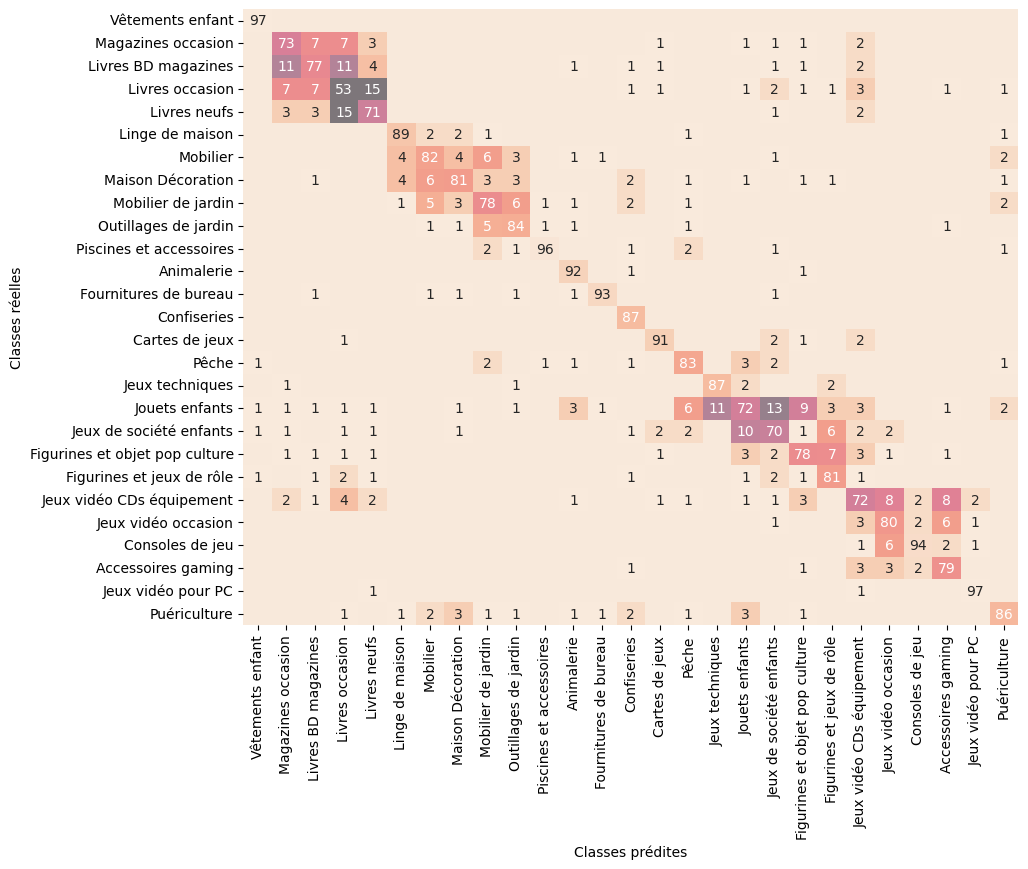

In [17]:
res.plot_classification_report('text/LinearSVC_tfidf')